In [19]:
import pandas as pd

In [20]:
import os 

In [21]:
from datetime import datetime as dt

In [74]:
import matplotlib.pyplot as plt

In [89]:
import numpy as np

In [6]:
desktop_path = os.path.join(os.path.expanduser("~"), 'Desktop')

In [7]:
treasury_yield_df = pd.read_csv(os.path.join(desktop_path, '10ytrescsv.csv'))

In [57]:
unemployment_df = pd.read_csv(os.path.join(desktop_path, 'unemploymentrate.csv'))

In [18]:
print(treasury_yield_df.head(20))

          DATE T10Y2Y
0   2018-10-22   0.28
1   2018-10-23   0.28
2   2018-10-24   0.26
3   2018-10-25   0.28
4   2018-10-26   0.27
5   2018-10-29   0.27
6   2018-10-30   0.28
7   2018-10-31   0.28
8   2018-11-01    0.3
9   2018-11-02   0.31
10  2018-11-05   0.29
11  2018-11-06   0.29
12  2018-11-07   0.26
13  2018-11-08   0.26
14  2018-11-09   0.25
15  2018-11-12      .
16  2018-11-13   0.25
17  2018-11-14   0.26
18  2018-11-15   0.25
19  2018-11-16   0.27


In [30]:
treasury_yield_df['DATE'] = pd.to_datetime(treasury_yield_df['DATE'])

In [65]:
unemployment_df['DATE'] = unemployment_df['DATE'].dt.to_period('M') 

In [38]:
treasury_yield_df['T10Y2Y'] = pd.to_numeric(treasury_yield_df['T10Y2Y'], errors = 'coerce')

In [52]:
treasury_yield_df['month'] = treasury_yield_df['DATE'].dt.to_period('M')

In [56]:
#print(treasury_yield_df.head(20))

In [47]:
monthly_avg_yield_df = treasury_yield_df.groupby('Month')['T10Y2Y'].mean().reset_index()

In [49]:
print(monthly_avg_yield_df.round(2))

      Month  T10Y2Y
0   2018-10    0.28
1   2018-11    0.26
2   2018-12    0.16
3   2019-01    0.17
4   2019-02    0.17
..      ...     ...
56  2023-06   -0.89
57  2023-07   -0.93
58  2023-08   -0.73
59  2023-09   -0.64
60  2023-10   -0.32

[61 rows x 2 columns]


In [58]:
print(unemployment_df.head(10))

         DATE  UNRATE
0  1948-01-01     3.4
1  1948-02-01     3.8
2  1948-03-01     4.0
3  1948-04-01     3.9
4  1948-05-01     3.5
5  1948-06-01     3.6
6  1948-07-01     3.6
7  1948-08-01     3.9
8  1948-09-01     3.8
9  1948-10-01     3.7


In [59]:
unemployment_df['DATE'] = pd.to_datetime(unemployment_df['DATE'])

In [60]:
unemployment_df = unemployment_df[unemployment_df['DATE'] >= '2018-10-01']

In [68]:
print(unemployment_df)

        DATE  UNRATE
849  2018-10     3.8
850  2018-11     3.8
851  2018-12     3.9
852  2019-01     4.0
853  2019-02     3.8
854  2019-03     3.8
855  2019-04     3.6
856  2019-05     3.7
857  2019-06     3.6
858  2019-07     3.7
859  2019-08     3.7
860  2019-09     3.5
861  2019-10     3.6
862  2019-11     3.6
863  2019-12     3.6
864  2020-01     3.5
865  2020-02     3.5
866  2020-03     4.4
867  2020-04    14.7
868  2020-05    13.2
869  2020-06    11.0
870  2020-07    10.2
871  2020-08     8.4
872  2020-09     7.9
873  2020-10     6.9
874  2020-11     6.7
875  2020-12     6.7
876  2021-01     6.3
877  2021-02     6.2
878  2021-03     6.1
879  2021-04     6.1
880  2021-05     5.8
881  2021-06     5.9
882  2021-07     5.4
883  2021-08     5.2
884  2021-09     4.8
885  2021-10     4.5
886  2021-11     4.2
887  2021-12     3.9
888  2022-01     4.0
889  2022-02     3.8
890  2022-03     3.6
891  2022-04     3.6
892  2022-05     3.6
893  2022-06     3.6
894  2022-07     3.5
895  2022-08 

In [71]:
merged_dataframe = pd.merge(monthly_avg_yield_df.round(2), unemployment_df, left_on= "Month", right_on= "DATE", how='inner')

In [72]:
print(merged_dataframe)

      Month  T10Y2Y     DATE  UNRATE
0   2018-10    0.28  2018-10     3.8
1   2018-11    0.26  2018-11     3.8
2   2018-12    0.16  2018-12     3.9
3   2019-01    0.17  2019-01     4.0
4   2019-02    0.17  2019-02     3.8
5   2019-03    0.16  2019-03     3.8
6   2019-04    0.19  2019-04     3.6
7   2019-05    0.19  2019-05     3.7
8   2019-06    0.26  2019-06     3.6
9   2019-07    0.22  2019-07     3.7
10  2019-08    0.06  2019-08     3.7
11  2019-09    0.05  2019-09     3.5
12  2019-10    0.16  2019-10     3.6
13  2019-11    0.20  2019-11     3.6
14  2019-12    0.25  2019-12     3.6
15  2020-01    0.24  2020-01     3.5
16  2020-02    0.17  2020-02     3.5
17  2020-03    0.42  2020-03     4.4
18  2020-04    0.43  2020-04    14.7
19  2020-05    0.50  2020-05    13.2
20  2020-06    0.54  2020-06    11.0
21  2020-07    0.48  2020-07    10.2
22  2020-08    0.51  2020-08     8.4
23  2020-09    0.54  2020-09     7.9
24  2020-10    0.64  2020-10     6.9
25  2020-11    0.70  2020-11     6.7
2

In [75]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [83]:
merged_dataframe['Month'] = merged_dataframe['Month'].astype(str)

([<matplotlib.axis.XTick at 0x169cfec50>,
 [Text(0, 0, '2018-10'),
  Text(3, 0, '2019-01'),
  Text(6, 0, '2019-04'),
  Text(9, 0, '2019-07'),
  Text(12, 0, '2019-10'),
  Text(15, 0, '2020-01'),
  Text(18, 0, '2020-04'),
  Text(21, 0, '2020-07'),
  Text(24, 0, '2020-10'),
  Text(27, 0, '2021-01'),
  Text(30, 0, '2021-04'),
  Text(33, 0, '2021-07'),
  Text(36, 0, '2021-10'),
  Text(39, 0, '2022-01'),
  Text(42, 0, '2022-04'),
  Text(45, 0, '2022-07'),
  Text(48, 0, '2022-10'),
  Text(51, 0, '2023-01'),
  Text(54, 0, '2023-04'),
  Text(57, 0, '2023-07')])

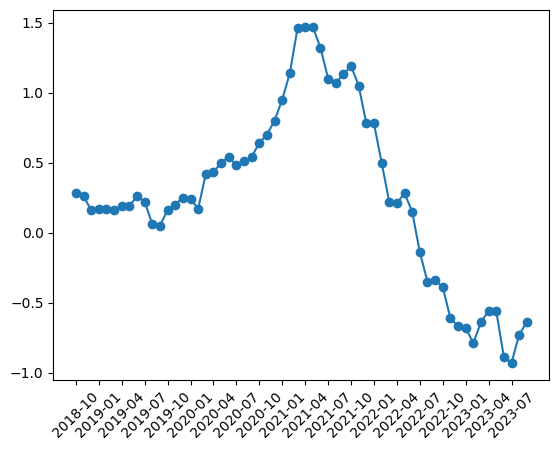

In [93]:
plt.plot(merged_dataframe['Month'], merged_dataframe['T10Y2Y'], label = 'Average Yield', marker='o')
plt.xticks(np.arange(0, len(merged_dataframe['Month']), step=3), merged_dataframe['Month'][::3], rotation=45)

In [81]:
merged_dataframe['DATE'] = merged_dataframe['DATE'].astype(str)

([<matplotlib.axis.XTick at 0x169b86010>,
 [Text(0, 0, '2018-10'),
  Text(3, 0, '2019-01'),
  Text(6, 0, '2019-04'),
  Text(9, 0, '2019-07'),
  Text(12, 0, '2019-10'),
  Text(15, 0, '2020-01'),
  Text(18, 0, '2020-04'),
  Text(21, 0, '2020-07'),
  Text(24, 0, '2020-10'),
  Text(27, 0, '2021-01'),
  Text(30, 0, '2021-04'),
  Text(33, 0, '2021-07'),
  Text(36, 0, '2021-10'),
  Text(39, 0, '2022-01'),
  Text(42, 0, '2022-04'),
  Text(45, 0, '2022-07'),
  Text(48, 0, '2022-10'),
  Text(51, 0, '2023-01'),
  Text(54, 0, '2023-04'),
  Text(57, 0, '2023-07')])

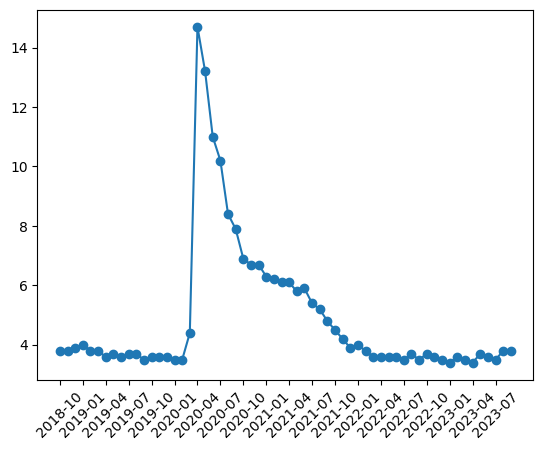

In [92]:
plt.plot(merged_dataframe['DATE'], merged_dataframe['UNRATE'], label = 'Unemployment Rate', marker = 'o')
plt.xticks(np.arange(0, len(merged_dataframe['DATE']), step=3), merged_dataframe['DATE'][::3], rotation=45)